In [121]:
from __future__ import division  # python 2에서 3에서 사용될 / 연산자의 사용법을 미리 사용 
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas
import pandas as pd
np.set_printoptions(precision=4, threshold=500)
pd.options.display.max_rows = 100

In [122]:
import json
db = json.load(open('ch07/foods-2011-10-03.json'))
len(db)

6636

In [123]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [124]:
db[0]['nutrients'][0]

{'description': 'Protein',
 'group': 'Composition',
 'units': 'g',
 'value': 25.18}

In [125]:
nutrients = DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [126]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = DataFrame(db, columns=info_keys)

In [127]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [128]:
info

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [129]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [130]:
nutrients = []

for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [131]:
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [132]:
nutrients.duplicated().sum()

14179

In [133]:
nutrients = nutrients.drop_duplicates()

In [134]:
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [135]:
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [136]:
ndata = pd.merge(nutrients, info, on='id', how='outer')

In [137]:
ndata

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.180,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.200,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.060,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.280,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.000,1008,"Cheese, caraway",Dairy and Egg Products,
5,Water,Composition,g,39.280,1008,"Cheese, caraway",Dairy and Egg Products,
6,Energy,Energy,kJ,1573.000,1008,"Cheese, caraway",Dairy and Egg Products,
7,"Fiber, total dietary",Composition,g,0.000,1008,"Cheese, caraway",Dairy and Egg Products,
8,"Calcium, Ca",Elements,mg,673.000,1008,"Cheese, caraway",Dairy and Egg Products,
9,"Iron, Fe",Elements,mg,0.640,1008,"Cheese, caraway",Dairy and Egg Products,


In [138]:
ndata.ix[30000]

C:\Users\Donghyeon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

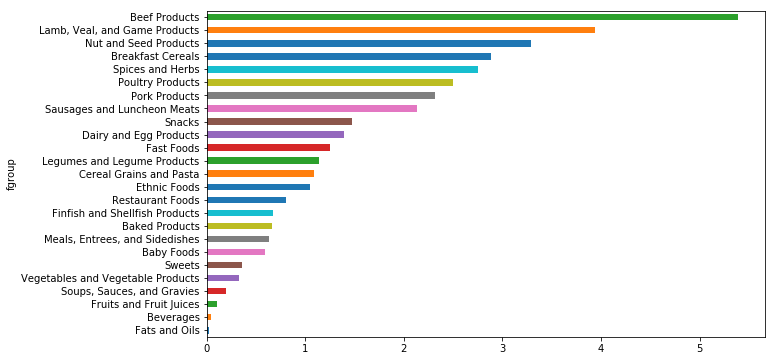

In [139]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [140]:
result

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.9000
                  Vegetables and Vegetable Products     2.1800
Alanine           Baby Foods                            0.0850
                  Baked Products                        0.2480
                  Beef Products                         1.5500
                  Beverages                             0.0030
                  Breakfast Cereals                     0.3110
                  Cereal Grains and Pasta               0.3730
                  Dairy and Egg Products                0.2710
                  Ethnic Foods                          1.2900
                  Fast Foods                            0.5140
                  Fats and Oils                         0.0000
                  Finfish and Shellfish Products        1.2180
                  Fruits and Fruit Juices               0.0270
                  Lamb, Veal, and Game Products         1.4080
   

In [141]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

In [142]:
max_foods.ix['Amino Acids']['food']

C:\Users\Donghyeon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 

In [143]:
get_max_val =  {}
get_max_val2 = {}

for rec in db :
    for rec2 in rec['nutrients'] :
        get_max_val[rec2['description']]=rec2['value']
    get_max_val2[rec['description']] = get_max_val
        

In [144]:
get_max_val2

{'Cheese, caraway': {'Adjusted Protein': 2.18,
  'Alanine': 1.798,
  'Alcohol, ethyl': 0.0,
  'Arginine': 1.913,
  'Ash': 0.76,
  'Aspartic acid': 2.694,
  'Beta-sitosterol': 64.0,
  'Betaine': 4.3,
  'Caffeine': 0.0,
  'Calcium, Ca': 4.0,
  'Campesterol': 7.0,
  'Carbohydrate, by difference': 21.34,
  'Carotene, alpha': 2.0,
  'Carotene, beta': 2.0,
  'Cholesterol': 0.0,
  'Choline, total': 4.1,
  'Copper, Cu': 0.04,
  'Cryptoxanthin, beta': 0.0,
  'Cystine': 0.382,
  'Dihydrophylloquinone': 0.0,
  'Energy': 381.0,
  'Fatty acids, total monounsaturated': 0.028,
  'Fatty acids, total polyunsaturated': 0.041,
  'Fatty acids, total saturated': 0.072,
  'Fatty acids, total trans': 0.0,
  'Fatty acids, total trans-monoenoic': 1.028,
  'Fatty acids, total trans-polyenoic': 0.034,
  'Fiber, total dietary': 1.6,
  'Fluoride, F': 22.4,
  'Folate, DFE': 17.0,
  'Folate, food': 17.0,
  'Folate, total': 17.0,
  'Folic acid': 0.0,
  'Fructose': 0.7,
  'Galactose': 0.0,
  'Glucose (dextrose)': 1.54

#  영양소 기준 측정단위별 value값 보기

In [148]:
result2 = ndata.groupby(['nutrient', 'units'])['value'].quantile(0.5)

In [149]:
result2

nutrient                            units  
Adjusted Protein                    g            7.5400
Alanine                             g            0.5840
Alcohol, ethyl                      g            0.0000
Arginine                            g            0.6740
Ash                                 g            1.2200
Aspartic acid                       g            1.0490
Beta-sitosterol                     mg          47.5000
Betaine                             mg           6.3000
Caffeine                            mg           0.0000
Calcium, Ca                         mg          24.0000
Campesterol                         mg           6.0000
Carbohydrate, by difference         g           11.0000
Carotene, alpha                     mcg          0.0000
Carotene, beta                      mcg          0.0000
Cholesterol                         mg           2.0000
Choline, total                      mg          24.2500
Copper, Cu                          mg           0.0980
Cryp

# 측정 단위별 음식의 일일 섭취량

In [150]:
portions = []

for rec in db :
    fpors = DataFrame(rec['portions'])
    fpors['id'] = rec['id']
    portions.append(fpors)

portions = pd.concat(portions, ignore_index = True)

In [151]:
portions

,amount,grams,id,unit
0,1.0,28.35,1008,oz
1,1.0,132.00,1009,"cup, diced"
2,2.0,244.00,1009,"cup, melted"
3,3.0,113.00,1009,"cup, shredded"
4,4.0,28.35,1009,oz
5,5.0,17.00,1009,cubic inch
6,6.0,28.00,1009,slice (1 oz)
7,1.0,28.35,1018,oz
8,2.0,198.00,1018,package (7 oz)
9,1.0,150.00,1019,"cup, crumbled"


In [152]:
pdata = pd.merge(portions, info, on='id', how='inner')

In [153]:
pdata

,amount,grams,id,unit,food,fgroup,manufacturer
0,1.0,28.35,1008,oz,"Cheese, caraway",Dairy and Egg Products,
1,1.0,132.00,1009,"cup, diced","Cheese, cheddar",Dairy and Egg Products,
2,2.0,244.00,1009,"cup, melted","Cheese, cheddar",Dairy and Egg Products,
3,3.0,113.00,1009,"cup, shredded","Cheese, cheddar",Dairy and Egg Products,
4,4.0,28.35,1009,oz,"Cheese, cheddar",Dairy and Egg Products,
5,5.0,17.00,1009,cubic inch,"Cheese, cheddar",Dairy and Egg Products,
6,6.0,28.00,1009,slice (1 oz),"Cheese, cheddar",Dairy and Egg Products,
7,1.0,28.35,1018,oz,"Cheese, edam",Dairy and Egg Products,
8,2.0,198.00,1018,package (7 oz),"Cheese, edam",Dairy and Egg Products,
9,1.0,150.00,1019,"cup, crumbled","Cheese, feta",Dairy and Egg Products,


In [154]:
# food 혹은 fgroup으로 groupby를 하면 이름이 너무 길어 보기 안 좋아 직관적으로 보기 좋게 id값으로 groupby
result2 = pdata.groupby(['id','unit'])['grams'].quantile(0.5)

In [155]:
result2

id     unit                               
1008   oz                                      28.35
1009   cubic inch                              17.00
       cup, diced                             132.00
       cup, melted                            244.00
       cup, shredded                          113.00
       oz                                      28.35
       slice (1 oz)                            28.00
1018   oz                                      28.35
       package (7 oz)                         198.00
1019   cubic inch                              17.00
       cup, crumbled                          150.00
       oz                                      28.35
       wedge (1.33 oz)                         38.00
1025   tbsp                                     6.00
       tsp                                      1.90
1026   tbsp, whole                              6.70
       tsp, whole                               2.10
1027   tbsp, ground                             4.50
   

# ndata와 pdata 합치고 groupby

In [156]:
npdata = pd.merge(portions, ndata, on='id', how='outer')

In [157]:
npdata

,amount,grams,id,unit,nutrient,nutgroup,units,value,food,fgroup,manufacturer
0,1.0,28.35,1008,oz,Protein,Composition,g,25.180,"Cheese, caraway",Dairy and Egg Products,
1,1.0,28.35,1008,oz,Total lipid (fat),Composition,g,29.200,"Cheese, caraway",Dairy and Egg Products,
2,1.0,28.35,1008,oz,"Carbohydrate, by difference",Composition,g,3.060,"Cheese, caraway",Dairy and Egg Products,
3,1.0,28.35,1008,oz,Ash,Other,g,3.280,"Cheese, caraway",Dairy and Egg Products,
4,1.0,28.35,1008,oz,Energy,Energy,kcal,376.000,"Cheese, caraway",Dairy and Egg Products,
5,1.0,28.35,1008,oz,Water,Composition,g,39.280,"Cheese, caraway",Dairy and Egg Products,
6,1.0,28.35,1008,oz,Energy,Energy,kJ,1573.000,"Cheese, caraway",Dairy and Egg Products,
7,1.0,28.35,1008,oz,"Fiber, total dietary",Composition,g,0.000,"Cheese, caraway",Dairy and Egg Products,
8,1.0,28.35,1008,oz,"Calcium, Ca",Elements,mg,673.000,"Cheese, caraway",Dairy and Egg Products,
9,1.0,28.35,1008,oz,"Iron, Fe",Elements,mg,0.640,"Cheese, caraway",Dairy and Egg Products,


In [158]:
result3 = npdata.groupby(['id','nutrient','unit'])['grams'].quantile(0.5)

In [159]:
result3

id     nutrient                            unit                       
1008   Alanine                             oz                              28.35
       Arginine                            oz                              28.35
       Ash                                 oz                              28.35
       Aspartic acid                       oz                              28.35
       Calcium, Ca                         oz                              28.35
       Carbohydrate, by difference         oz                              28.35
       Cholesterol                         oz                              28.35
       Copper, Cu                          oz                              28.35
       Cystine                             oz                              28.35
       Energy                              oz                              28.35
       Fatty acids, total monounsaturated  oz                              28.35
       Fatty acids, total polyunsatura